In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd

DATA_PATH = 'C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/raw_data/'
csv_names = [
    'iMBANK_CARD_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CARD_DATA_2023(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', 
    'iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv'
    ]
datasets = {}
def read_data(csv_names):
    for i in range(len(csv_names)):
        datasets[f"data_{i+1}"] = pd.read_csv(f"{DATA_PATH}{csv_names[i]}", encoding='cp949')

        print(f'data input complete! : {csv_names[i]} as data_{i+1}')
    print('All data read complete!')

read_data(csv_names)

data input complete! : iMBANK_CARD_DATA_2021(K-DigitalTraining).csv as data_1
data input complete! : iMBANK_CARD_DATA_2022(K-DigitalTraining).csv as data_2
data input complete! : iMBANK_CARD_DATA_2023(K-DigitalTraining).csv as data_3
data input complete! : iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv as data_4
data input complete! : iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv as data_5
data input complete! : iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv as data_6
All data read complete!


# 층화추출 적용
- card 데이터의 경우 그룹이 너무 많으면 메모리가 감당하지 못한다 
- 그래서 년월과 지역 두 가지로만 층화추출을 진행했다.

- 24.10.31 수정 -> card data 층화추출 요소에 '고객ID' 추가

In [22]:
sample_df = datasets['data_4'].groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.01))
sample_df.shape

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\1445902252.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = datasets['data_4'].groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.01))


(206314, 13)

In [23]:
#tempo= datasets['data_1'].groupby(['거래년월','고객ID' ,'가맹점_광역시도'], group_keys=False).apply(lambda x: x.sample(frac=0.01))
#tempo.head(1)


### 11/01 층화추출 비율을 5%로 변경함

In [24]:
# 데이터를 넣을 딕셔너리 생성
customer_data = {}
card_data = {}

def sample_dataset(datasets):

    # 데이터를 넣을 딕셔너리 생성
    customer_data = {}
    card_data = {}

    # 데이터 층화 추출 - 칼럼들 기준
    for i in range(4,7):
        customer_data[f"{2020 + (i-3)}"] = datasets[f'data_{i}'].dropna().groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))
        print(f'customer data {2020 + (i-3)} sampled!')

    for i in range(1,4):
        card_data[f"{2020 + i}"] = datasets[f'data_{i}'].dropna().groupby(['거래년월','가맹점업종명','가맹점_광역시도','가맹점_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))
        print(f'card data {2020 + i} sampled!')

    print('-----Sample Complete-----')
    return customer_data, card_data

customer_data, card_data = sample_dataset(datasets)
card_data['2021'].info()

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_data[f"{2020 + (i-3)}"] = datasets[f'data_{i}'].dropna().groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


customer data 2021 sampled!


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_data[f"{2020 + (i-3)}"] = datasets[f'data_{i}'].dropna().groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


customer data 2022 sampled!


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_data[f"{2020 + (i-3)}"] = datasets[f'data_{i}'].dropna().groupby(['기준년월', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


customer data 2023 sampled!


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  card_data[f"{2020 + i}"] = datasets[f'data_{i}'].dropna().groupby(['거래년월','가맹점업종명','가맹점_광역시도','가맹점_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


card data 2021 sampled!


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  card_data[f"{2020 + i}"] = datasets[f'data_{i}'].dropna().groupby(['거래년월','가맹점업종명','가맹점_광역시도','가맹점_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


card data 2022 sampled!
card data 2023 sampled!
-----Sample Complete-----
<class 'pandas.core.frame.DataFrame'>
Index: 3016535 entries, 58962768 to 434210
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int64 
 1   고객ID      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
dtypes: int64(3), object(4)
memory usage: 184.1+ MB


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_6880\2805561267.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  card_data[f"{2020 + i}"] = datasets[f'data_{i}'].dropna().groupby(['거래년월','가맹점업종명','가맹점_광역시도','가맹점_시군구'], group_keys=False).apply(lambda x: x.sample(frac=0.05))


In [25]:
card_data['2021']['가맹점_시군구'].value_counts()

가맹점_시군구
중구     406934
달서구    379998
수성구    329440
북구     287384
동구     219371
        ...  
증평군        29
고창군        25
서천군        16
영광군        10
무안군        10
Name: count, Length: 208, dtype: int64

In [26]:
datasets['data_1']['가맹점_시군구'].value_counts()

가맹점_시군구
중구     8148185
달서구    7600912
수성구    6589354
북구     5754217
동구     4394302
        ...   
완도군        686
고창군        593
서천군        359
무안군        284
영광군        276
Name: count, Length: 208, dtype: int64

# MERGE DATA

In [27]:
merged_2023 = pd.merge(card_data['2023'], customer_data['2023'], on = '고객ID', how='left')
merged_2022 = pd.merge(card_data['2022'], customer_data['2022'], on = '고객ID', how='left')
merged_2021 = pd.merge(card_data['2021'], customer_data['2021'], on = '고객ID', how='left')
merged_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648477 entries, 0 to 3648476
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   거래년월      int64  
 1   고객ID      int64  
 2   가맹점업종명    object 
 3   가맹점_광역시도  object 
 4   가맹점_시군구   object 
 5   승인건수      object 
 6   승인금액      int64  
 7   기준년월      float64
 8   연령대       object 
 9   성별        object 
 10  고객등급      object 
 11  자택_시도     object 
 12  자택_시군구    object 
 13  수신_요구불예금  float64
 14  수신_거치식예금  float64
 15  수신_적립식예금  float64
 16  수신_펀드     float64
 17  수신_외화예금   float64
 18  대출금액      float64
dtypes: float64(7), int64(3), object(9)
memory usage: 528.9+ MB


In [28]:
merged_data = [merged_2021,merged_2022,merged_2023]

file_names_card = [
    "card_2021_sample.csv",
    "card_2022_sample.csv",
    "card_2023_sample.csv"
]

file_names_customer = [
    "customer_2021_sample.csv",
    "customer_2022_sample.csv",
    "customer_2023_sample.csv"
]

file_names_merged = [
    "merged_2021.csv",
    "merged_2022.csv",
    "merged_2023.csv"
]

for (key, df), name in zip(card_data.items(), file_names_card):
    df.to_csv(f"sampled_data/{name}", index = False)
    print(f"Saved {name}")

for (key, df), name in zip(customer_data.items(), file_names_customer):
    df.to_csv(f"sampled_data/{name}", index = False)
    print(f"Saved {name}")

for df, name in zip(merged_data, file_names_merged):
    df.to_csv(f"sampled_data/{name}", index = False)
    print(f"Saved {name}")

print('save complete!')

Saved card_2021_sample.csv
Saved card_2022_sample.csv
Saved card_2023_sample.csv
Saved customer_2021_sample.csv
Saved customer_2022_sample.csv
Saved customer_2023_sample.csv
Saved merged_2021.csv
Saved merged_2022.csv
Saved merged_2023.csv
save complete!


# Changed merged data method

In [29]:
merged_2023 = pd.merge(card_data['2023'], customer_data['2023'], on = '고객ID', how='outer')
merged_2022 = pd.merge(card_data['2022'], customer_data['2022'], on = '고객ID', how='outer')
merged_2021 = pd.merge(card_data['2021'], customer_data['2021'], on = '고객ID', how='outer')
merged_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477204 entries, 0 to 4477203
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   거래년월      float64
 1   고객ID      int64  
 2   가맹점업종명    object 
 3   가맹점_광역시도  object 
 4   가맹점_시군구   object 
 5   승인건수      object 
 6   승인금액      float64
 7   기준년월      float64
 8   연령대       object 
 9   성별        object 
 10  고객등급      object 
 11  자택_시도     object 
 12  자택_시군구    object 
 13  수신_요구불예금  float64
 14  수신_거치식예금  float64
 15  수신_적립식예금  float64
 16  수신_펀드     float64
 17  수신_외화예금   float64
 18  대출금액      float64
dtypes: float64(9), int64(1), object(9)
memory usage: 649.0+ MB


In [30]:
merged_data = [merged_2021,merged_2022,merged_2023]

file_names_merged = [
    "merged_full_2021.csv",
    "merged_full_2022.csv",
    "merged_full_2023.csv"
]

for df, name in zip(merged_data, file_names_merged):
    df.to_csv(f"sampled_data/{name}", index = False)
    print(f"Saved {name}")

Saved merged_full_2021.csv
Saved merged_full_2022.csv
Saved merged_full_2023.csv


# 카드 데이터 중복 없이 Card 위주로 Join된 데이터 생성
- join의 결과로 Card의 행에 변화가 있어서는 안 된다 -> shape에 변화가 있어서 안됨

In [31]:
# 데이터 불러오기

card_data_21 = pd.read_csv('sampled_data/card_2021_sample.csv')
card_data_22 = pd.read_csv('sampled_data/card_2022_sample.csv')
card_data_23 = pd.read_csv('sampled_data/card_2023_sample.csv')

customer_data_21 = pd.read_csv('sampled_data/customer_2021_sample.csv')
customer_data_22 = pd.read_csv('sampled_data/customer_2022_sample.csv')
customer_data_23 = pd.read_csv('sampled_data/customer_2023_sample.csv')

In [32]:
# 고객 ID로 그룹화 및 필요한 칼럼의 첫 번쨰 값(.first())만 빼오기

age_col_21 = customer_data_21.groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()
age_col_22 = customer_data_21.groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()
age_col_23 = customer_data_21.groupby('고객ID')[['연령대', '성별', '고객등급', '자택_시도', '자택_시군구']].first().reset_index()

In [33]:
# merge 진행 -> 그룹화된 customer data와 card 데이터 조인

data_21 = card_data_21.merge(age_col_21, on = '고객ID', how = 'left').dropna()
data_22 = card_data_22.merge(age_col_22, on = '고객ID', how = 'left').dropna()
data_23 = card_data_23.merge(age_col_23, on = '고객ID', how = 'left').dropna()

- 함수화가 가능한가?

In [34]:
# 데이터 리스트화 하기

data_list = [data_21, data_22, data_23]

In [35]:
# 데이터 csv로 내보내기


file_names_merged = [
    "card_base_2021.csv",
    "card_base_2022.csv",
    "card_base_2023.csv"
]

for df, name in zip(data_list, file_names_merged):
    df.to_csv(f"sampled_data/{name}", index = False)
    print(f"Saved {name}")

Saved card_base_2021.csv
Saved card_base_2022.csv
Saved card_base_2023.csv


### 모집단과 표본집단의 비율 차이 확인 - 시각화를 위주로

In [36]:
def make_pie_chart(df_list):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    explode = (0,0,0.1,0,0.1,0)

    for i, df in enumerate(df_list):
        age_counts = df['연령대'].value_counts()
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} age piechart")

    plt.show()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\campus3S031\Deskt

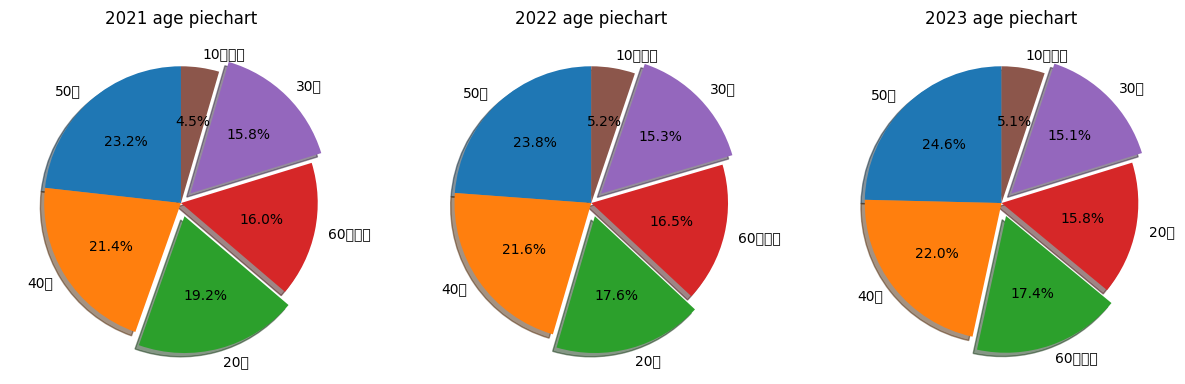

In [37]:
make_pie_chart(data_list)

# 한식 대 서양음식

In [44]:
datasets['data_1'].head(3)

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,202112,4080934272,일반한식,경상북도,경주시,5번이하,20000
1,202112,4116127380,일반한식,경상북도,경주시,5번이하,20000
2,202112,2914424833,일반한식,경상북도,경주시,5번이하,20000


In [43]:
print(datasets['data_1']['가맹점업종명'][datasets['data_1']['가맹점업종명'] == '일반한식'].value_counts())
print(datasets['data_1']['가맹점업종명'][datasets['data_1']['가맹점업종명'] == '서양음식'].value_counts())

가맹점업종명
일반한식    8751749
Name: count, dtype: int64
가맹점업종명
서양음식    4763634
Name: count, dtype: int64


In [46]:
print(datasets['data_1']['가맹점업종명'][datasets['data_1']['가맹점_광역시도'] == '서울특별시'][datasets['data_1']['가맹점업종명'] == '일반한식'].value_counts())
print(datasets['data_1']['가맹점업종명'][datasets['data_1']['가맹점_광역시도'] == '서울특별시'][datasets['data_1']['가맹점업종명'] == '서양음식'].value_counts())

가맹점업종명
일반한식    134932
Name: count, dtype: int64
가맹점업종명
서양음식    331545
Name: count, dtype: int64
